## Conectando o Drive

In [ ]:
from google.colab import drive
from google_drive_downloader import GoogleDriveDownloader as drive
data_google_id = '1iOoTKw3G6izNt3LRzkTQ5pUCrW8ZxRqx'
drive.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './DataSet1.csv',
                                    showsize = True)

##Importação das ferramentas utilizadas



In [ ]:


#manipulação de dados
import pandas as pd

#exibição de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#métricas de avaliação do modelo
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, classification_report, confusion_matrix

#função para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split, GridSearchCV

#modelo SVM
from sklearn.svm import SVC

#modelo KNN
from sklearn.neighbors import KNeighborsClassifier

#modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

#modelo Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

##Importando DataFrame

In [ ]:
#importação dos dados
df = pd.read_csv('./DataSet1.csv')
display(df)

,Unnamed: 0,dados_antropometricos,dados_histopatologicos_mama,registro_de_tumores,ki67_perc_mean,ki67_perc_last,height,weight,follow_up_days_recidive,follow_up_days_recidive_mean,follow_up_days_recidive_std,sister_n,bmi_mean,bmi_std,record_id,output_os
0,0,20.0,3.0,3.0,15.0,15.0,152.100000,67.335000,1338.0,1338.0,0.0,-1.0,29.114000,0.435775,54,1
1,1,25.0,1.0,1.0,-1.0,-1.0,157.909091,59.916000,-1.0,-1.0,0.0,-1.0,24.403571,1.296000,302,1
2,2,35.0,1.0,1.0,20.0,20.0,155.117647,63.451471,2442.0,2442.0,0.0,-1.0,25.668421,4.313029,710,1
3,3,10.0,1.0,1.0,-1.0,-1.0,152.000000,83.110000,-1.0,-1.0,0.0,-1.0,35.961538,0.525259,752,1
4,4,19.0,1.0,1.0,-1.0,-1.0,167.000000,64.173684,-1.0,-1.0,0.0,-1.0,23.040909,0.518844,1589,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,4129,8.0,1.0,1.0,30.0,30.0,156.000000,94.550000,-1.0,-1.0,0.0,-1.0,38.825000,0.843039,82057,0
4130,4130,6.0,1.0,1.0,15.0,15.0,164.000000,74.275000,-1.0,-1.0,0.0,-1.0,27.583333,0.508060,82059,0
4131,4131,4.0,1.0,1.0,-1.0,-1.0,155.000000,60.400000,-1.0,-1.0,0.0,-1.0,25.192857,0.240535,82122,0
4132,4132,5.0,1.0,1.0,-1.0,-1.0,174.400000,133.612500,-1.0,-1.0,0.0,-1.0,37.900000,15.436598,82205,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


df

In [ ]:
#preenchimento dos nulo com um número para treino do modelo
df = df.fillna(-1)

df = df.replace("baixa", 0)
df = df.replace("média", 1)
df = df.replace("alta", 2)

##Separando os dados

In [ ]:
#variáveis independentes
x = df.drop(['output_os', 'record_id'], axis=1)

#variável dependente (target)
y = df.output_os

In [ ]:
#divisão dos dados entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [ ]:
#verificando se a divisão foi feita corretamente
x_test.shape, y_test.shape

((1241, 14), (1241,))

##Modelos

In [ ]:
#dicionário em que os modelos treinados serão armazenados
models = {}

#dicionário em que as métricas de cada modelo serão armazenadas
metricas = {}

#instanciando os modelos que serão utilizados para treino
training = {'Decision Tree': DecisionTreeClassifier(random_state=3), 'KNN': KNeighborsClassifier(), 'Random Forest': RandomForestClassifier(random_state=3), 'SVM': SVC(random_state=3)}

#laço que itera sobre cada modelo do dicionário acima
for name, modelo in training.items():
  #treinando o modelo
  modelo.fit(x_train, y_train)

  #fazendo predições com o modelo treinado
  predicao = modelo.predict(x_test)
  metricas[name] = {'accuracy': accuracy_score(y_test,predicao), 'precision': precision_score(y_test, predicao), 'recall': recall_score(y_test, predicao), 'f1-score': f1_score(y_test, predicao)}

In [ ]:
#criando um dataframe a partir do dicionários das métricas
metrics_df = pd.DataFrame(metricas)
metrics_df

,Decision Tree,KNN,Random Forest,SVM
accuracy,0.719581,0.763900,0.774376,0.761483
precision,0.724473,0.755385,0.764977,0.727524
recall,0.715200,0.785600,0.796800,0.841600
f1-score,0.719807,0.770196,0.780564,0.780415


## Grid Search


In [ ]:
n_neighbors = list(range(1,20))
p=[1,2]
#Convert to dictionary
knn_hyperparameters = dict(n_neighbors=n_neighbors, p=p)

In [ ]:
metricas = {}

In [ ]:
modelos_parametros = {
    'Random Forest': [RandomForestClassifier(), {'max_depth': [80, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 5], 'min_samples_split': [8, 12], 'n_estimators': [100, 300]}],
    'KNN': [KNeighborsClassifier(), knn_hyperparameters],
    'SVM': [SVC(), {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}],
    'Decision Tree': [DecisionTreeClassifier(), {'max_depth': [80, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 5], 'min_samples_split': [8, 12]}]
}

In [ ]:
for name, model in modelos_parametros.items():
  #instancia o algoritmo, passando o modelo e o dicionário com os paramêtros
  grid_search = GridSearchCV(estimator = model[0], param_grid = model[1], 
                          cv = 2, n_jobs = -1, verbose = 2)
  #treinando o algoritmo
  grid_search.fit(x_train, y_train)
  #selecionando o melhor modelo, com os melhores hiperparâmetros 
  modelo = grid_search.best_estimator_
  modelo.fit(x_train,y_train)
  predicao = modelo.predict(x_test)
  print(modelo)

  metricas[name] = {'accuracy': accuracy_score(y_test,predicao), 'precision': precision_score(y_test, predicao), 'recall': recall_score(y_test, predicao), 'f1-score': f1_score(y_test, predicao), 'auc': roc_auc_score(y_test, predicao)}

Fitting 2 folds for each of 32 candidates, totalling 64 fits
RandomForestClassifier(max_depth=110, max_features=2, min_samples_leaf=5,
                       min_samples_split=8)
Fitting 2 folds for each of 38 candidates, totalling 76 fits
KNeighborsClassifier(n_neighbors=19, p=1)
Fitting 2 folds for each of 25 candidates, totalling 50 fits
SVC(C=1, gamma=0.0001)
Fitting 2 folds for each of 16 candidates, totalling 32 fits
DecisionTreeClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=12)


In [ ]:
metricas_tunadas = metricas
metricas_tunadas

{'Random Forest': {'accuracy': 0.7719580983078163,
  'precision': 0.7522123893805309,
  'recall': 0.816,
  'f1-score': 0.782808902532617,
  'auc': 0.7716363636363637},
 'KNN': {'accuracy': 0.7711522965350524,
  'precision': 0.7548579970104634,
  'recall': 0.808,
  'f1-score': 0.7805255023183927,
  'auc': 0.770883116883117},
 'SVM': {'accuracy': 0.7719580983078163,
  'precision': 0.7688679245283019,
  'recall': 0.7824,
  'f1-score': 0.7755749405233942,
  'auc': 0.7718818181818182},
 'Decision Tree': {'accuracy': 0.7348912167606769,
  'precision': 0.73125,
  'recall': 0.7488,
  'f1-score': 0.7399209486166007,
  'auc': 0.7347896103896103}}

# Documentação

# Procedimento

Os modelos utilizados para treino durante esses experimentos iniciais foram:
* Decision Tree
* Random Forest
* K Nearest Neighbors
* SVM (Support Vector Machines)

O procedimento para treino dos modelos é o seguinte:
1. Importação das bibliotecas utilizadas:
  * Pandas (manipulação dos dados)
  * Matplotlib (visualização dos resultados)
  * Numpy
  * Scikit Learn (treino dos modelos e avaliação)

2. Importação dos dados:
  * Foi utilizada a base de dados 'DataSet3', que deriva da tabela principal manipulada durante a última sprint.

3. Divisão dos dados em treino e teste:
  * Inicialmente, separamos a coluna da variável target (output_os) e, após isso, dividimos os dados em treino e teste utilizando a função train_test_split da biblioteca model_selection do sklearn. A divisão foi feita com base na proporção 80/20, ou seja, 80% dos dados foram utilizados para treino e 20% para teste.

4. Treino:
  * Após a separação dos dados, importamos e instanciamos os modelos e, por fim, os treinamos, utilizando a função .fit() do sklearn.

5. Predições:
  * Com os modelos treinados, utilizamos a função .predict() para realizar previsões em cima dos dados de teste.

6. Avaliação dos modelos:
  * Por fim, comparamos as predições com os dados de teste da variável target, para conseguirmos avaliar o quão bem os modelos se saíram. 
  
# Métricas de avaliação

* A partir dessa comparação, temos os falsos negativos, falsos positivos, verdadeiros positivos e verdadeiros negativos, e a partir disso conseguimos calcular as seguintes métricas:
    1. Precision (Precisão): dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas. 
    2. Recall (Revocação): dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas.
    3. F1-Score: média harmônica entre precision e recall.
    4. Acurácia: dentre todas as classificações que o modelo fez, independentemente de classe, quantas estão corretas.
    5. AUC: área de baixo da curva ROC (Receiver operating characteristic):

As fórmulas para essas métricas são:
  <img src="https://miro.medium.com/max/1400/1*t1vf-ofJrJqtmam0KSn3EQ.png">

# Modelos 

Neste primeiro momento, escolhemos os modelos Árvore de Decisão, Random Forest, KNN e SVM para uma primeira análise. Essa escolha se deve, principalmente, ao fato de todos consistirem em algoritmos de classificação de fácil entendimento e interpretação.

## Árvore de decisão

Uma árvore de decisão é uma ferramenta de suporte à tomada de decisão, usando um gráfico no formato de árvore e demonstrando visualmente as condições e as probabilidades para se chegar aos resultados. O algoritmo utilizado para chegar na representação visual da árvore pertence ao grupo de aprendizado de máquina supervisionado, funcionando tanto para regressão quanto para classificação. Elas são tão utilizadas porque fornecem ao usuário final uma fácil interpretação e desenham uma espécie de caminho a ser percorrido para alcançar um determinado objetivo.

## Random Forest

Random Forest consiste em um modelo construído para realizar classificações e regressões a partir de um conjunto de Árvores de Decisão. Nesse caso, a saída é a classe selecionada pelo maior número de árvores de decisão (Classificação). Para modelos de regressão, a sáida é a média das predições de cada árvore. No entanto, as características dos dados utilizados podem afetar, negativamente, os resultados obtidos.

## KNN

KNN é um algoritmo de classificação e regressão que consiste, basicamente, na análise dos pontos mais próximos ao ponto predito. No caso da classificação, o algoritmo analisará a classe dos N pontos mais próximos e classificará o novo ponto com base na classe que mais aparece entre os pontos mais próximos. A regressão, por sua vez, realiza o mesmo procedimento, porém com valores numéricos, ou seja, com base na média dos valores mais próximos. Nesse contexto, o número de "vizinhos" levados em consideração é uma variável e pode ser definido pelo programador.

## SVM

O SVM é um algoritmo que busca uma linha de separação entre duas classes distintas analisando os dois pontos, um de cada grupo, mais próximos da outra classe. Isto é, o SVM escolhe, entre os dois grupos, o hiperplano que se distancia mais de cada um.
Existem grupos que não podem ser separados somente por hiperplanos. Nesses casos, utilizamos o SVM não linear para delimitar as duas classes, que traçará uma ou mais linhas retas ou curvas para separar as classes da melhor forma possível.

#Comparação dos Modelos
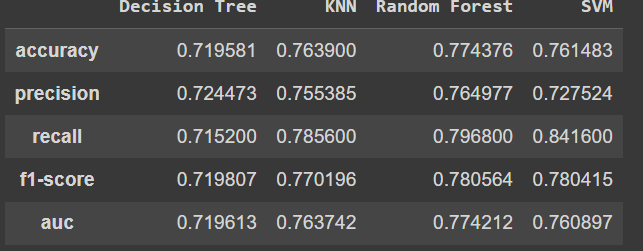

  Com base nas métricas de avaliação, entende-se que os resultados preliminares foram satisfatórios e atingiram uma porcentagem de acertos maior que a esperada para uma primeira análise. Nesse contexto, o modelo Random Forest se sobressaiu em relação aos demais, visto que obteve as maiores métricas, com excessão do Recall. Isso se deve ao fato do Random Forest ser um modelo extremamente robusto e se sair bem em grande parte dos casos, uma vez que é do tipo ensemble e combina várias árvores de decisão para obter um resultado mais preciso.

  Nesse primeiro momento, por ainda não se ter certeza sobre a métrica que mais deve ser valorizada na análise comparativa, adotamos a estratégia de escolher o modelo que se saiu melhor na maioria das métricas utilizadas. Desta forma, por ter obtido o melhor resultado em 4 das 5 métricas, optamos pelo modelo que utiliza o Random Forest.


In [ ]:
#sem tunar
metrics_df

,Decision Tree,KNN,Random Forest,SVM
accuracy,0.719581,0.763900,0.774376,0.761483
precision,0.724473,0.755385,0.764977,0.727524
recall,0.715200,0.785600,0.796800,0.841600
f1-score,0.719807,0.770196,0.780564,0.780415


In [ ]:
#tunandas
metrics_tuned = pd.DataFrame(metricas_tunadas)
metrics_tuned[['Decision Tree', 'KNN', 'Random Forest', 'SVM']]

,Decision Tree,KNN,Random Forest,SVM
accuracy,0.734891,0.771152,0.771958,0.771958
precision,0.731250,0.754858,0.752212,0.768868
recall,0.748800,0.808000,0.816000,0.782400
f1-score,0.739921,0.780526,0.782809,0.775575
auc,0.734790,0.770883,0.771636,0.771882
